### TD(0) Prediction Algorithm

This notebook implements the Tabular TD(0) algorithm for estimating the state-value function V, as described in Sutton and Barto's "Reinforcement Learning: An Introduction" (2nd Edition, p. 120).

![TD(0) Algorithm Pseudocode](./Figures/TD0Prediction.png)

In [1]:
from rlgridworld.standard_grid import create_standard_grid
import numpy as np
# Necessary import for the new plot
import matplotlib.pyplot as plt

### Game Simulation Function

This function simulates a single episode of the GridWorld game based on a given policy and exploration rate (epsilon). It returns the sequence of states visited and the rewards received.

In [2]:
def play_game(gw, policy, epsilon ):

    # game starting state
    state = (0,0) 
    # list of tuples that are (state, reward) pairs
    # states_and_rewards = [(state,0)] # list of tuples that are (state, reward) pairs
    states_and_rewards = []
    converged = False
    while not converged:
        # get action from policy
        action = policy[state] # get action from policy
        # get all valid actions at state
        all_actions = gw.valid_decisions(state) 
        # choose a random action with probability epsilon
        action = random_action(action, all_actions, epsilon) 
        # find reward for the action
        reward = gw.get_reward_for_action(state, action)
        # new state
        stateprime = move(state,action)
        # add new state and reward to the list
        states_and_rewards.append((stateprime,reward))
        # if you have moved to a terminal state, then stop
        if gw.is_terminal(stateprime):
            converged = True
        # update state to new state
        state = stateprime
    return states_and_rewards


def move(state, action): # only valid actions at states are sent to move
    i,j = state
    if action == 'left':
        j = j-1
    if action == 'right':
        j = j+1
    if action == 'down':
        i = i-1
    if action == 'up':
        i = i+1
    return (i,j)


def random_action(action, all_actions, epsilon ):
    p = np.random.random_sample()
    if p < (1 - epsilon):
        return action
    else:
        return np.random.choice(all_actions)

### GridWorld Setup and Parameters

Initialize the standard GridWorld environment. Define the fixed policy to be evaluated, and set the hyperparameters for the TD(0) algorithm: discount factor (gamma), learning rate (alpha), exploration probability (epsilon), and the total number of episodes for training.

In [3]:
gw = create_standard_grid()
policy = { 
        (0,0):'up', (0,1):'right', (0,2):'right', (0,3):'up', 
        (1,0):'up', (1,1):'', (1,2):'right', (1,3):'', 
        (2,0):'right', (2,1):'right', (2,2):'right', (2,3):'' 
        }
gamma = 0.9 # discount factor for future rewards
alpha = 0.1 # fraction for value update
epsilon = 0.1 # explore/exploit probability of exploration
number_play_game = 1000 # number of game play iterations

### Initial Policy Visualization

Display the policy being evaluated.

In [4]:
gw.print_policy(policy)

-------------------------------------
|  Right |  Right |  Right |        |
-------------------------------------
|     Up |        |  Right |        |
-------------------------------------
|     Up |  Right |  Right |     Up |
-------------------------------------


### First Episode Simulation

Run one episode using the defined policy and exploration rate.

In [5]:
states_and_rewards = play_game(gw, policy, epsilon)

### Examining the Trajectory

Show the sequence of (state, reward) pairs from the first episode.

In [6]:
states_and_rewards # see the state path and rewards

[((1, 0), 0.0), ((2, 0), 0.0), ((2, 1), 0.0), ((2, 2), 0.0), ((2, 3), 1.0)]

### First TD(0) Update

Apply the TD(0) update rule to the value function based on the experience gathered in the first episode.

In [7]:
for t in range(len(states_and_rewards) - 1 ):
    state, _ = states_and_rewards[t]
    stateprime, reward = states_and_rewards[t+1]
    current_value = gw.get_value(state)
    dest_value = gw.get_value(stateprime)
    new_value = current_value + alpha*(reward + gamma*dest_value - current_value)
    gw.set_value(state, new_value)

### Value Function After First Update

Display the updated value function. Observe the change in value for states visited during the first episode (e.g., state (2,2) if visited). The magnitude of the update depends on the learning rate alpha.

In [8]:
gw.print_values()

-------------------------------------
|   0.00 |   0.00 |   0.10 |   0.00 |
-------------------------------------
|   0.00 |   0.00 |   0.00 |   0.00 |
-------------------------------------
|   0.00 |   0.00 |   0.00 |   0.00 |
-------------------------------------


### Second Episode Simulation

Run a second episode.

In [9]:
states_and_rewards = play_game(gw, policy, epsilon)

In [10]:
states_and_rewards

[((1, 0), 0.0), ((2, 0), 0.0), ((2, 1), 0.0), ((2, 2), 0.0), ((2, 3), 1.0)]

### Second TD(0) Update

Update the value function again based on the experience from the second episode.

In [11]:
for t in range(len(states_and_rewards) - 1 ):
    state, _ = states_and_rewards[t]
    stateprime, reward = states_and_rewards[t+1]
    current_value = gw.get_value(state)
    dest_value = gw.get_value(stateprime)
    new_value = current_value + alpha*(reward + gamma*dest_value - current_value)
    gw.set_value(state, new_value)

### Value Function After Second Update

Show the value function after two episodes.

In [12]:
gw.print_values()

-------------------------------------
|   0.00 |   0.01 |   0.19 |   0.00 |
-------------------------------------
|   0.00 |   0.00 |   0.00 |   0.00 |
-------------------------------------
|   0.00 |   0.00 |   0.00 |   0.00 |
-------------------------------------


### TD(0) Training Loop

Run the TD(0) algorithm for a specified number of episodes to estimate the value function. We also track the value of state (0,0) during training.

In [13]:
value_0_0_history = [] # Store value of state (0,0) over episodes
for i in range(number_play_game):
    states_and_rewards = play_game(gw, policy, epsilon)
    for t in range(len(states_and_rewards) - 1 ):
        state, _ = states_and_rewards[t]
        stateprime, reward = states_and_rewards[t+1]
        current_value = gw.get_value(state)
        dest_value = gw.get_value(stateprime)
        new_value = current_value + alpha*(reward + gamma*dest_value - current_value)
        gw.set_value(state, new_value)
    # Store the value of state (0,0) after each episode update
    value_0_0_history.append(gw.get_value((0,0))) 
    # Optional: Print progress
    # if (i + 1) % 100 == 0:
    #     print(f"Episode {i+1}/{number_play_game} completed.")

### Final Results

Display the evaluated policy and the final estimated state values after running TD(0) for all episodes.

In [14]:
print("Policy")
gw.print_policy(policy)
print("")
# Print values from TD Learning
print("Values from TD(0) Learning")
gw.print_values()

Policy
-------------------------------------
|  Right |  Right |  Right |        |
-------------------------------------
|     Up |        |  Right |        |
-------------------------------------
|     Up |  Right |  Right |     Up |
-------------------------------------

Values from TD(0) Learning
-------------------------------------
|   0.74 |   0.85 |   0.98 |   0.00 |
-------------------------------------
|   0.67 |   0.00 |  -0.97 |   0.00 |
-------------------------------------
|   0.57 |  -0.59 |  -0.83 |  -0.96 |
-------------------------------------


### Value Function Convergence for State (0,0)

The following plot shows the estimated value of the starting state (0,0) over the course of the training episodes. This helps visualize how the TD(0) algorithm converges towards the true value function for that state.

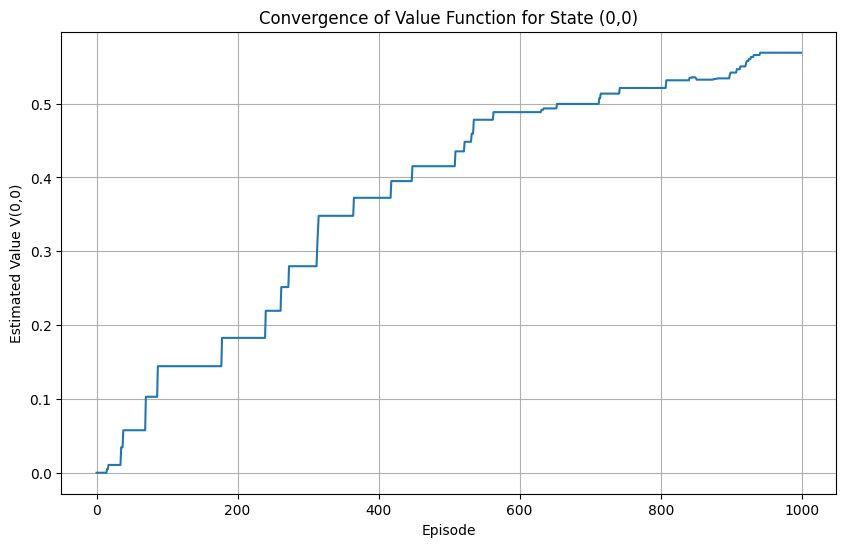

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(value_0_0_history)
plt.title('Convergence of Value Function for State (0,0)')
plt.xlabel('Episode')
plt.ylabel('Estimated Value V(0,0)')
plt.grid(True)
plt.show()